In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/home/cristian/miniconda3/envs/bulldozers/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [111]:
dict(zip(df.columns, df.dtypes))

{'SalesID': dtype('int64'),
 'SalePrice': dtype('float64'),
 'MachineID': dtype('int64'),
 'ModelID': dtype('int64'),
 'datasource': dtype('int64'),
 'auctioneerID': dtype('float64'),
 'YearMade': dtype('float64'),
 'MachineHoursCurrentMeter': dtype('float64'),
 'UsageBand': dtype('int64'),
 'fiModelDesc': dtype('int64'),
 'fiBaseModel': dtype('int64'),
 'fiSecondaryDesc': dtype('int64'),
 'fiModelSeries': dtype('int64'),
 'fiModelDescriptor': dtype('int64'),
 'ProductSize': dtype('int64'),
 'fiProductClassDesc': dtype('int64'),
 'state': dtype('int64'),
 'ProductGroup': dtype('int64'),
 'ProductGroupDesc': dtype('int64'),
 'Drive_System': dtype('int64'),
 'Enclosure': dtype('int64'),
 'Forks': dtype('int64'),
 'Pad_Type': dtype('int64'),
 'Ride_Control': dtype('int64'),
 'Stick': dtype('int64'),
 'Transmission': dtype('int64'),
 'Turbocharged': dtype('int64'),
 'Blade_Extension': dtype('int64'),
 'Blade_Width': dtype('int64'),
 'Enclosure_Type': dtype('int64'),
 'Engine_Horsepower': d

In [29]:
df["state"].unique()

array(['Alabama', 'North Carolina', 'New York', 'Texas', 'Arizona',
       'Florida', 'Illinois', 'Oregon', 'Ohio', 'Arkansas', 'Wisconsin',
       'Kansas', 'Nevada', 'Iowa', 'Maine', 'Massachusetts', 'California',
       'Louisiana', 'Minnesota', 'New Hampshire', 'Idaho', 'Michigan',
       'Mississippi', 'Georgia', 'Missouri', 'South Carolina', 'Utah',
       'Tennessee', 'Washington', 'Virginia', 'South Dakota',
       'West Virginia', 'Oklahoma', 'Pennsylvania', 'Wyoming',
       'North Dakota', 'New Jersey', 'Kentucky', 'Montana', 'Alaska',
       'Nebraska', 'Maryland', 'Hawaii', 'Colorado', 'New Mexico',
       'Indiana', 'Connecticut', 'Delaware', 'Rhode Island', 'Vermont',
       'Washington DC', 'Puerto Rico', 'Unspecified'], dtype=object)

In [143]:
from sklearn import preprocessing as sk_preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

class LabelEncoder(sk_preprocessing.LabelEncoder):
    def fit(self, X, y= None):
        return super().fit(X)
    
    def fit_transform(self, X, y=None):
        return super().fit_transform(X[:, 0])

def get_transform(mode):
    
    if mode == "train":
        return lambda preprocessor, x: preprocessor.fit_transform(x)
    else:
        return lambda preprocessor, x: preprocessor.transform(x)

def input_fn(df, params, preprocessors, mode):
    
    df = df.copy()
    
    transfrom = get_transform(mode)
    
    ## apply preprocessors
    for column, preprocessor in preprocessors.items():
        try:
            df[column] = transfrom(preprocessor, df[[column]])
        except:
            print(f"Failed on column: {column}")
            raise
            
    # drop unused columns
    
    df.drop(columns=["saledate"], inplace=True)
        
    return df


def get_data(params):
    
    df = pd.read_csv("../inputs/bluebook-for-bulldozers/TrainAndValid.csv", parse_dates=["saledate"])

    ## data engineering
    df["SalePrice"] = np.log(df["SalePrice"])
    df = df[df.YearMade > 1800]
    df["YearMade"] = df["YearMade"].astype(np.float32)
    
    for col, dtype in zip(df.columns, df.dtypes):
        if dtype == np.dtype('O'):
            df[col] = df[col].astype(str)
        

    return df
        
def get_preprocessors(df, params, ignore=["saledate"]):
    
    return {
        col: Pipeline([
            ("missing", SimpleImputer(strategy="constant", fill_value="nan")),
            ("encode", LabelEncoder())
        ]) 
        if df[col].dtype == np.dtype('O')
        else Pipeline([
            ("encode", sk_preprocessing.MinMaxScaler()),
            ("missing", SimpleImputer(strategy="median")),
        ]) 
        if df[col].dtype == np.float64 or df[col].dtype == np.float32
        else Pipeline([
            ("missing", SimpleImputer(strategy="constant", fill_value=-1)),
            ("encode", LabelEncoder())
        ]) 
        
        for col in df.columns
        if col not in ignore
    }

In [144]:
params = dict()
df = get_data(params)
preprocessors = get_preprocessors(df, params)
X_train = input_fn(df, params, preprocessors, "train")
y_train = X_train.pop("SalePrice")

/home/cristian/miniconda3/envs/bulldozers/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [146]:
df

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,11.097410,999089,3157,121,3.0,2004.0,68.0,Low,2006-11-16,...,nan,nan,nan,nan,nan,nan,nan,nan,Standard,Conventional
1,1139248,10.950807,117657,77,121,3.0,1996.0,4640.0,Low,2004-03-26,...,nan,nan,nan,nan,nan,nan,nan,nan,Standard,Conventional
2,1139249,9.210340,434808,7009,121,3.0,2001.0,2838.0,High,2004-02-26,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1139251,10.558414,1026470,332,121,3.0,2001.0,3486.0,High,2011-05-19,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1139253,9.305651,1057373,17311,121,3.0,2007.0,722.0,Medium,2009-07-23,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,9.210340,1919201,21435,149,2.0,2005.0,NaN,nan,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan
412694,6333345,9.259131,1882122,21436,149,2.0,2005.0,NaN,nan,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan
412695,6333347,9.433484,1944213,21435,149,2.0,2005.0,NaN,nan,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan
412696,6333348,9.210340,1794518,21435,149,2.0,2006.0,NaN,nan,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,nan,nan,nan,nan,nan


In [145]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='auto',
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42,
)


model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

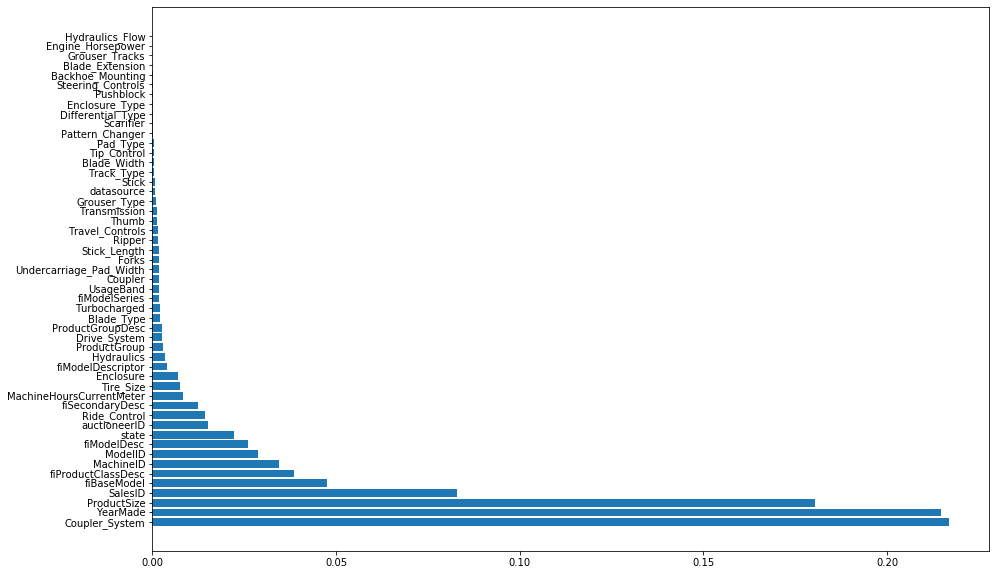

In [147]:
df_features = pd.DataFrame(dict(feature=X_train.columns,importance=model.feature_importances_))
df_features.sort_values(by="importance", ascending=False, inplace=True)

plt.figure(figsize=(15,10))
plt.barh(df_features["feature"], df_features["importance"])

plt.show()

In [152]:
groups = df.groupby("Coupler_System")
dfg = groups.size()

In [153]:
dfg

Coupler_System
None or Unspecified     37788
Yes                      3058
nan                    332461
dtype: int64

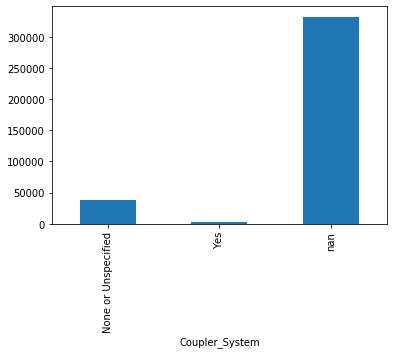

In [154]:
dfg.plot.bar()